IMPORTING LIBRARIES

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from sklearn.cluster import KMeans

IMPORTING DATASET

In [2]:
df = pd.read_csv(r'E:\Machine Learning\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
score=df['Spending Score (1-100)']

In [43]:
age=df['Age']

In [44]:
age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [47]:
age.mode()[0] # Maximum people having age of

32

In [12]:
score.unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

In [13]:
score.shape

(200,)

In [14]:
Income=df['Annual Income (k$)']

In [15]:
Income.unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [16]:
Income.shape

(200,)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

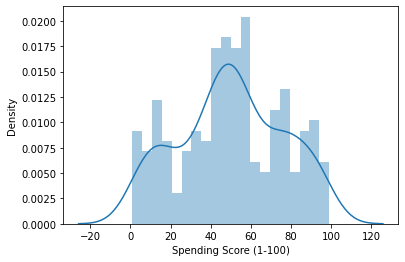

In [35]:
sns.distplot(score,bins=20)

In [30]:
score.mode()[0]

42

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

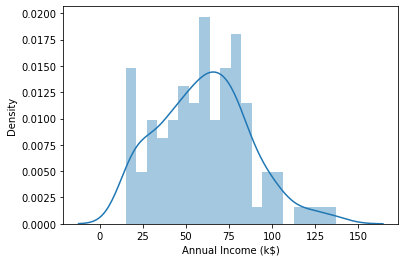

In [33]:
sns.distplot(Income,bins=20)

In [25]:
Income.mode()[0]

54

In [26]:
Income.mean()

60.56

WE MIGHT NOT REQUIRE FEATURES SUCH AS AGE AND CUSTOMER_ID
ONLY TAKING VALUES OF INCOME AND SCORE

In [50]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

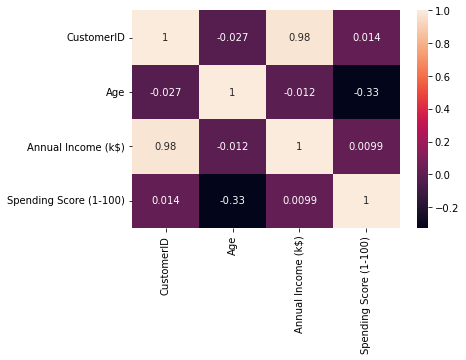

In [49]:
sns.heatmap(df.corr(),annot=True)

Optimum Clusters:

In [54]:
x=df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

In [55]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

ELBOW DIAGRAM TO KNOW OPTIMUM NUMBER OF CLUSTERS:

In [69]:
wcss=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'Within cluster sum of squares(WCSS)')

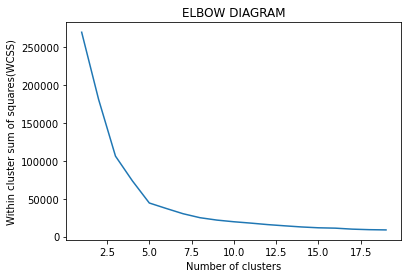

In [77]:
plt.plot(range(1,20),wcss)
plt.title("ELBOW DIAGRAM")
plt.xlabel('Number of clusters')
plt.ylabel("Within cluster sum of squares(WCSS)")

Optimum clusters come out to be 5.

TRAIN THE MODEL:

In [79]:
MODEL_KMEANS=KMeans(n_clusters=5,init='k-means++',random_state=42)
MODEL_KMEANS.fit(x)

KMeans(n_clusters=5, random_state=42)

Predicting Y-Values

In [124]:
y_pred = MODEL_KMEANS.fit_predict(x)

In [125]:
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [126]:
x[y_pred]

array([[16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [16, 77],
       [16,  6],
       [15, 39],
       [16,  6],
       [16, 77],
       [15, 39],
       [15, 39],
       [15, 39],
       [15, 39],
       [15, 39],
       [15, 39],
       [15, 39],
       [15, 39],
       [15, 39],
       [15, 39],
       [15, 39],
       [15, 39],
       [15, 39

TOTAL--> 5 CLUSTERS

Visualizing 5 clusters

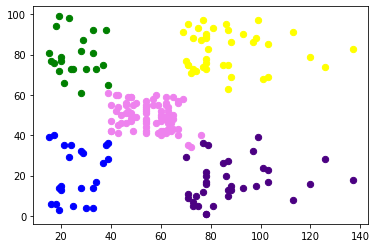

In [130]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=40,color='violet',label='Cluster 1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=40,color='indigo',label='Cluster 2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=40,color='blue',label='Cluster 3')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],s=40,color='Green',label='Cluster 4')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],s=40,color='Yellow',label='Cluster 5')


Applying the coordinates of centroids:

Text(0.5, 0, 'Annual Income \n Cluster1 :Violet, Cluster2:indigo,Cluster3:blue,Cluster4:Green,Cluster5:Yellow')

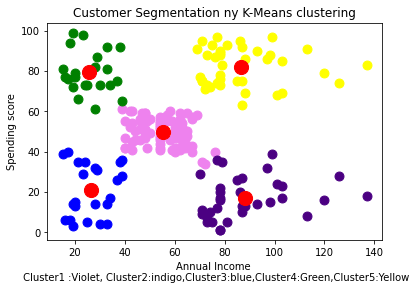

In [135]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=80,color='violet',label='Cluster 1')
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=80,color='indigo',label='Cluster 2')
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=80,color='blue',label='Cluster 3')
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],s=80,color='Green',label='Cluster 4')
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],s=80,color='Yellow',label='Cluster 5')
plt.scatter(MODEL_KMEANS.cluster_centers_[:,0],MODEL_KMEANS.cluster_centers_[:,1],s=200,color='r',label='Centroids')
plt.title("Customer Segmentation ny K-Means clustering")
plt.ylabel("Spending score")
plt.xlabel("Annual Income \n Cluster1 :Violet, Cluster2:indigo,Cluster3:blue,Cluster4:Green,Cluster5:Yellow")

Understanding from the cluster Analysis:

##### Violet : Earning more , Spending less , can be termed as Careful
##### Yellow : Earning more,Spending more, They are Living Luxurious life
##### Pink : Earning medium, spending medium, Decent life style
##### Green: People who earn less, spend more, Most careless people when comes to expenses
##### Blue : People who earn less,spends less